In [3]:
import string

from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk

import warnings
warnings.filterwarnings('ignore')

In [4]:
text=open('Demonetization.txt',encoding="utf-8").read()

In [5]:
lower_case=text.lower()

In [6]:
cleaned_text1=lower_case.translate(str.maketrans('','',string.punctuation))

In [7]:
tokenized_words=word_tokenize(cleaned_text1)

In [8]:
cleaned_text1

'while the year 2019 will bring with it formation of new government after the elections in april 2019 the after effects of demonetization that happened on november 8 2016 still haunt the indian economy after more than 2 years of demonetization indian economic survey claims that the economy has done away with all the negative impacts of demonetization however economic experts are of the view that the economy is still crying for a faster growth and little objective has been achieved by the demonetization move \n\ndemonetization still haunts indian economy\nthe demonetization was announced as a surprise in the night on november 8 2016  the economic survey of india which was released just before the presentation of general budget 2018 in parliament emphasized that all the negative impact of demonetization of rs500 and rs1000 currency notes has ended however the analysis in india and abroad has claimed that demonetization of november 2016 has failed to do what it was supposed to do and its 

In [9]:
final_words=[]

for w in tokenized_words:
    if w not in stopwords.words('english'):
        final_words.append(w)

In [10]:
lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [11]:
final_words

['year',
 '2019',
 'bring',
 'formation',
 'new',
 'government',
 'elections',
 'april',
 '2019',
 'effects',
 'demonetization',
 'happened',
 'november',
 '8',
 '2016',
 'still',
 'haunt',
 'indian',
 'economy',
 '2',
 'years',
 'demonetization',
 'indian',
 'economic',
 'survey',
 'claims',
 'economy',
 'done',
 'away',
 'negative',
 'impacts',
 'demonetization',
 'however',
 'economic',
 'experts',
 'view',
 'economy',
 'still',
 'crying',
 'faster',
 'growth',
 'little',
 'objective',
 'achieved',
 'demonetization',
 'move',
 'demonetization',
 'still',
 'haunts',
 'indian',
 'economy',
 'demonetization',
 'announced',
 'surprise',
 'night',
 'november',
 '8',
 '2016',
 'economic',
 'survey',
 'india',
 'released',
 'presentation',
 'general',
 'budget',
 '2018',
 'parliament',
 'emphasized',
 'negative',
 'impact',
 'demonetization',
 'rs500',
 'rs1000',
 'currency',
 'notes',
 'ended',
 'however',
 'analysis',
 'india',
 'abroad',
 'claimed',
 'demonetization',
 'november',
 '201

In [24]:
 with open('emotions.txt','a+') as file:
    file.write("'amused': 'happy',\n'crying': 'sad',\n'criticized': 'condemn',\n'inconvenience': 'annoyed'")
    file.close()
    

In [25]:
emotion_list=[]
with open('emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word,emotion=clear_line.split(':')
        
        if word in final_words:
            emotion_list.append(emotion)
print("People emotions from the text \n", emotion_list)

People emotions from the text 
 [' attracted', ' fearless', ' average', ' obsessed', ' hated', ' sad', ' free', ' esteemed', ' happy', ' powerless', ' loved', ' adequate', ' sad', ' sad', ' sad', ' condemn', ' annoyed']


In [26]:
w = Counter(emotion_list)
print("Count of each emotion \n", w)

Count of each emotion 
 Counter({' sad': 4, ' attracted': 1, ' fearless': 1, ' average': 1, ' obsessed': 1, ' hated': 1, ' free': 1, ' esteemed': 1, ' happy': 1, ' powerless': 1, ' loved': 1, ' adequate': 1, ' condemn': 1, ' annoyed': 1})


In [28]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")


     ******Negative Sentiment*******


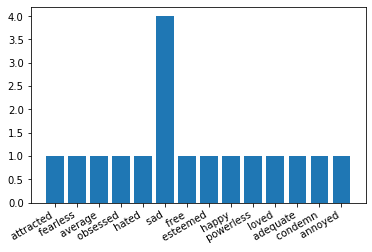

In [29]:
sentiment_analyse(cleaned_text1)

fig,ax1=plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.show()